# Финансовый анализ

- Дашборд [**Финансовый анализ**](<https://demo.fastboard.online/public/1660e7a3-d972-460f-87bc-d9eaba27fe7b/board/e41684f3-8c00-4ff4-ab7b-4d88a4dfba6b>) в BI-системе Fastboard.
- На конкурсе дашбордов Fastboard дашборд отмечен как “Лучший дашборд по мнению члена жюри”, [ссылка](https://t.me/Fastboard/220) на пост в канале BI Hub | Fastboard  в Telegram.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-и-обзор-данных" data-toc-modified-id="Загрузка-и-обзор-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка и обзор данных</a></span><ul class="toc-item"><li><span><a href="#Подключение-библиотек" data-toc-modified-id="Подключение-библиотек-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Подключение библиотек</a></span></li><li><span><a href="#Откроем-файлы-с-данными-и-изучим-общую-информацию" data-toc-modified-id="Откроем-файлы-с-данными-и-изучим-общую-информацию-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Откроем файлы с данными и изучим общую информацию</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Проверка-наличия-пропущенных-значений,-дубликатов,-аномальных-значений" data-toc-modified-id="Проверка-наличия-пропущенных-значений,-дубликатов,-аномальных-значений-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Проверка наличия пропущенных значений, дубликатов, аномальных значений</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Дашборд" data-toc-modified-id="Дашборд-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Дашборд</a></span></li><li><span><a href="#Анализ-и-рекомендации" data-toc-modified-id="Анализ-и-рекомендации-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Анализ и рекомендации</a></span></li></ul></div>

# Финансовый анализ

Цель: построить дашборд по финансовому анализу продаж магазина косметики, бытовой химии, предметов гигиены и т.д.

Пользователи: финансовые аналитики.

Вопросы исследования:
Финансовый анализ
1. Какие товарные группы приносят наибольшую прибыль  в абсолютном выражении?
2. Какие товары приносят наибольшую прибыль в абсолютном выражении?
3. Какие товарные группы/товары/бренды имеют самую высокую и низкую маржинальность?
4. Как наценка влияет на объемы продаж по разным товарным группам?
5. Есть ли корреляция между скидками и маржинальностью?
6. На каких товарах стоит сосредоточить усилия для максимизации прибыли?

Ход исследования:

Доступны данные о продажах (из файла Excel).

О качестве данных ничего неизвестно. Поэтому перед тем, как приступать к целям исследования, потребуется обзор данных. Нужно проверить данные на ошибки и оценить их влияние на исследование. Затем на этапе предобработки поискать возможности исправления данных, которые не приведут к искажению конечного результата. Далее разработать дашборд, провести анализ и подготовить рекомендации.

Таким образом, исследование пройдет в 4 этапа:

1. Загрузка и обзор данных;
2. Предобработка данных;
3. Дашборд [**Финансовый анализ**](<https://demo.fastboard.online/public/1660e7a3-d972-460f-87bc-d9eaba27fe7b/board/e41684f3-8c00-4ff4-ab7b-4d88a4dfba6b>);
4. Анализ и рекомендации.

## Загрузка и обзор данных

### Подключение библиотек

In [1]:
import os

import pandas as pd
import numpy as np

import datetime as dt

import warnings
warnings.filterwarnings(action='ignore')

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

### Откроем файлы с данными и изучим общую информацию

Считаем данные из файла и сохраним в переменную `sales`.

In [2]:
path = r'D:\\Fastboard\\' # путь к папке на локальном компьютере
if os.path.exists(path):
    sales = pd.read_excel(path + 'Продажи_расширенный_с_товарами.xlsx')
else:
    print('Файл не найден')

Сбросим ограничения на количество символов в записи.

In [3]:
pd.set_option('display.max_colwidth', None)

Изменим отображение чисел (округление до 2х знаков после запятой).

In [4]:
pd.options.display.float_format = '{: .2f}'.format

Установим стиль графиков.

In [5]:
sns.set()

Зададим функцию `data_summary()`, с помощью которой посмотрим на первые 5 строк датафрейма `sales` (транспонируем датафрейм для удобства чтения), получим информацию о столбцах и их типах, построим гистограммы (для числовых столбцов и столбцов с датой).

In [6]:
def data_summary(df):
    """Функция для изучения общей информации - выводит первые 5 строк датафрейма,
    столбцы и их типы, строит гистограммы.

    Аргумент:
        датафрейм.
    """
    print("Посмотрим на первые 5 строк датафрейма")
    display(df.head().T)   # транспонируем датафрейм для удобства чтения
    print('*'*120)
    print("Изучим столбцы и их типы")
    print()
    df.info()
    print('*'*120)
    print("Гистограммы")
    df.hist(figsize=(20, 10), bins=60)
    plt.show()

Применим функцию `data_summary()` к датафрейму `sales`.

Посмотрим на первые 5 строк датафрейма


,0,1,2,3,4
Период,2024-10-01 00:00:00,2024-10-01 00:00:00,2024-10-01 00:00:00,2024-10-01 00:00:00,2024-10-01 00:00:00
Регион,Алтайский край,Алтайский край,Алтайский край,Алтайский край,Алтайский край
ФИО,Иванов Павел,Иванов Павел,Иванов Павел,Иванов Павел,Иванов Павел
ФИО_сокращенно,Иванов П,Иванов П,Иванов П,Иванов П,Иванов П
Товарная группа,Декоративная косметика,Уходовая косметика,Уходовая косметика,Средства для волос,Средства для волос
Конкретный товар,Консилер,Скраб,Молочко для тела,Масло для волос,Мусс
Бренд,Maybelline,Cerave,L'Oreal,Head & Shoulders,L'Oreal
"Продано, шт",62.10,9.00,56.70,36.90,22.50
"Цена, шт",1242.00,900.00,1984.50,2398.50,2250.00
"План продаж, шт",69.39,10.09,62.29,42.86,25.39


************************************************************************************************************************
Изучим столбцы и их типы

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13104 entries, 0 to 13103
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Период                13104 non-null  datetime64[ns]
 1   Регион                13104 non-null  object        
 2   ФИО                   13104 non-null  object        
 3   ФИО_сокращенно        13104 non-null  object        
 4   Товарная группа       13104 non-null  object        
 5   Конкретный товар      13092 non-null  object        
 6   Бренд                 13104 non-null  object        
 7   Продано, шт           13104 non-null  float64       
 8   Цена, шт              13104 non-null  float64       
 9   План продаж, шт       13104 non-null  float64       
 10  Себестоимость, руб    13104 non-null  float

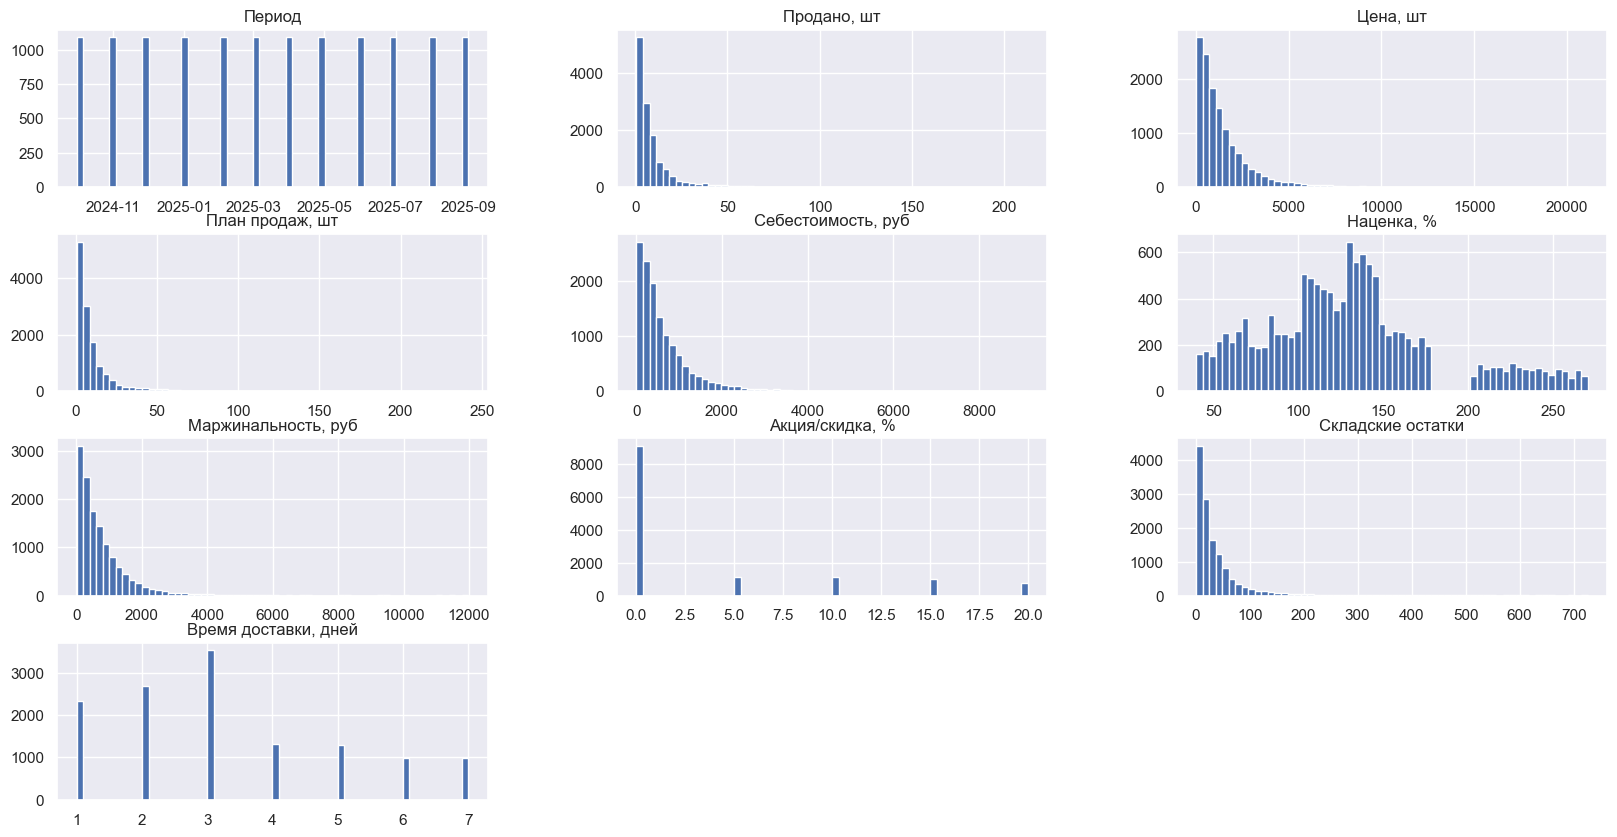

In [7]:
data_summary(sales)

### Вывод

- Доступны данные о продажах с октября 2024 по сентябрь 2025 на начало каждого месяца.
- В данных есть пропущенные значения в поле "Конкретный товар". 
- Предварительно считаем, что данных достаточно для анализа.  
- Типы данных логически верные.
- Посмотрим на данные подробнее на следующем этапе.

## Предобработка данных

### Проверка наличия пропущенных значений, дубликатов, аномальных значений

Создадим функцию для предобработки данных `make_preprocess()`, с помощью которой найдем количество и процент пропущенных значений в столбце, выведем числовое описание столбца, для столбцов с типом данных `object` выведем уникальные значения и частоту значений в столбце.

In [7]:
def make_preprocess(df):
    """Функция для предобработки данных находит количество и процент пропущенных значений
    в столбце, выводит числовое описание столбца,
    для столбцов с типом данных `object` выводит уникальные значения
    и частоту значений в столбце.

    Аргумент:
        датафрейм.
    """
    for column in df.columns:
        print(f"Cтолбец: {column}")
        print()
        print(
            f"Количество пропущенных значений (Null или NaN) {df[column].isna().sum()}"
        )
        print(f"Процент пропущенных значений {df[column].isna().mean().round(3):.1%}")
        print("*" * 90)
        print("Числовое описание столбца")
        print(df[column].describe())
        print("*" * 90)
        if df[column].dtype.name == "object":
            print("Уникальные значения в столбце")
            print(df[column].sort_values().unique())
            print("*" * 90)
            print("Частота в столбце")
            print(df[column].value_counts())
            print("*" * 90)

Применим функцию к датафрейму `sales`.

In [8]:
make_preprocess(sales)

Cтолбец: Период

Количество пропущенных значений (Null или NaN) 0
Процент пропущенных значений 0.0%
******************************************************************************************
Числовое описание столбца
count                   13104
unique                     12
top       2025-03-01 00:00:00
freq                     1092
first     2024-10-01 00:00:00
last      2025-09-01 00:00:00
Name: Период, dtype: object
******************************************************************************************
Cтолбец: Регион

Количество пропущенных значений (Null или NaN) 0
Процент пропущенных значений 0.0%
******************************************************************************************
Числовое описание столбца
count               13104
unique                  7
top       Республика Коми
freq                 2448
Name: Регион, dtype: object
******************************************************************************************
Уникальные значения в столбце
['Алтайский кр

- Проверим наличие явных дубликатов и удалим их (если они есть) с помощью функции `get_duplicates()`.

In [12]:
def get_duplicates(df):
    """Функция для проверки наличия явных дубликатов - выводит количество явных дубликатов,
    процент явных дубликатов или выводит сообщение, что явных дубликатов нет.

    Аргумент:
        датафрейм.
    """
    size = df.shape
    df_dupl = df.duplicated().sum()

    if df_dupl > 0:
        print(f"Количество явных дубликатов: {df_dupl}.")
        print(f"Процент явных дубликатов: {df_dupl/size[0]:.1%} данных.")
    else:
        print("Явных дубликатов нет.")

Применим эту функцию к датафрейму `sales`.

In [13]:
get_duplicates(sales)

Явных дубликатов нет.


1. Посмотрим на пропуски в поле "Конкретный товар"

In [34]:
sales[sales['Конкретный товар'].isna()].T

,927,2019,3111,4203,5295,6387,7479,8571,9663,10755,11847,12939
Период,2024-10-01 00:00:00,2024-11-01 00:00:00,2024-12-01 00:00:00,2025-01-01 00:00:00,2025-02-01 00:00:00,2025-03-01 00:00:00,2025-04-01 00:00:00,2025-05-01 00:00:00,2025-06-01 00:00:00,2025-07-01 00:00:00,2025-08-01 00:00:00,2025-09-01 00:00:00
Регион,Хабаровский край,Хабаровский край,Хабаровский край,Хабаровский край,Хабаровский край,Хабаровский край,Хабаровский край,Хабаровский край,Хабаровский край,Хабаровский край,Хабаровский край,Хабаровский край
ФИО,Пузикова Маргарита,Пузикова Маргарита,Пузикова Маргарита,Пузикова Маргарита,Пузикова Маргарита,Пузикова Маргарита,Пузикова Маргарита,Пузикова Маргарита,Пузикова Маргарита,Пузикова Маргарита,Пузикова Маргарита,Пузикова Маргарита
ФИО_сокращенно,Пузикова М,Пузикова М,Пузикова М,Пузикова М,Пузикова М,Пузикова М,Пузикова М,Пузикова М,Пузикова М,Пузикова М,Пузикова М,Пузикова М
Товарная группа,Подарочные сертификаты,Подарочные сертификаты,Подарочные сертификаты,Подарочные сертификаты,Подарочные сертификаты,Подарочные сертификаты,Подарочные сертификаты,Подарочные сертификаты,Подарочные сертификаты,Подарочные сертификаты,Подарочные сертификаты,Подарочные сертификаты
Конкретный товар,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Бренд,Неизвестный бренд,Неизвестный бренд,Неизвестный бренд,Неизвестный бренд,Неизвестный бренд,Неизвестный бренд,Неизвестный бренд,Неизвестный бренд,Неизвестный бренд,Неизвестный бренд,Неизвестный бренд,Неизвестный бренд
"Продано, шт",1.80,1.75,1.42,1.71,1.31,2.34,2.00,1.94,1.58,1.90,1.46,1.82
"Цена, шт",1800.00,1746.00,1422.00,1710.00,1314.00,2340.00,2000.00,1940.00,1580.00,1900.00,1460.00,1825.00
"План продаж, шт",1.93,1.96,1.68,1.87,1.45,2.50,2.33,2.08,1.82,2.22,1.68,1.93


In [35]:
# Число строк
sales[sales['Конкретный товар'].isna()].shape[0]

12

2. В поле "Бренд" есть значения 'Неизвестный бренд'

In [16]:
sales.query('Бренд == "Неизвестный бренд"').T

,927,2019,3111,4203,5295,6387,7479,8571,9663,10755,11847,12939
Период,2024-10-01 00:00:00,2024-11-01 00:00:00,2024-12-01 00:00:00,2025-01-01 00:00:00,2025-02-01 00:00:00,2025-03-01 00:00:00,2025-04-01 00:00:00,2025-05-01 00:00:00,2025-06-01 00:00:00,2025-07-01 00:00:00,2025-08-01 00:00:00,2025-09-01 00:00:00
Регион,Хабаровский край,Хабаровский край,Хабаровский край,Хабаровский край,Хабаровский край,Хабаровский край,Хабаровский край,Хабаровский край,Хабаровский край,Хабаровский край,Хабаровский край,Хабаровский край
ФИО,Пузикова Маргарита,Пузикова Маргарита,Пузикова Маргарита,Пузикова Маргарита,Пузикова Маргарита,Пузикова Маргарита,Пузикова Маргарита,Пузикова Маргарита,Пузикова Маргарита,Пузикова Маргарита,Пузикова Маргарита,Пузикова Маргарита
ФИО_сокращенно,Пузикова М,Пузикова М,Пузикова М,Пузикова М,Пузикова М,Пузикова М,Пузикова М,Пузикова М,Пузикова М,Пузикова М,Пузикова М,Пузикова М
Товарная группа,Подарочные сертификаты,Подарочные сертификаты,Подарочные сертификаты,Подарочные сертификаты,Подарочные сертификаты,Подарочные сертификаты,Подарочные сертификаты,Подарочные сертификаты,Подарочные сертификаты,Подарочные сертификаты,Подарочные сертификаты,Подарочные сертификаты
Конкретный товар,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Бренд,Неизвестный бренд,Неизвестный бренд,Неизвестный бренд,Неизвестный бренд,Неизвестный бренд,Неизвестный бренд,Неизвестный бренд,Неизвестный бренд,Неизвестный бренд,Неизвестный бренд,Неизвестный бренд,Неизвестный бренд
"Продано, шт",1.80,1.75,1.42,1.71,1.31,2.34,2.00,1.94,1.58,1.90,1.46,1.82
"Цена, шт",1800.00,1746.00,1422.00,1710.00,1314.00,2340.00,2000.00,1940.00,1580.00,1900.00,1460.00,1825.00
"План продаж, шт",1.93,1.96,1.68,1.87,1.45,2.50,2.33,2.08,1.82,2.22,1.68,1.93


In [20]:
# Число строк
sales.query('Бренд == "Неизвестный бренд"').shape[0]

12

Посмотрим на товарную группу "Подарочные сертификаты"

In [28]:
sales[sales['Товарная группа'] == "Подарочные сертификаты"].T

,927,2019,3111,4203,5295,6387,7479,8571,9663,10755,11847,12939
Период,2024-10-01 00:00:00,2024-11-01 00:00:00,2024-12-01 00:00:00,2025-01-01 00:00:00,2025-02-01 00:00:00,2025-03-01 00:00:00,2025-04-01 00:00:00,2025-05-01 00:00:00,2025-06-01 00:00:00,2025-07-01 00:00:00,2025-08-01 00:00:00,2025-09-01 00:00:00
Регион,Хабаровский край,Хабаровский край,Хабаровский край,Хабаровский край,Хабаровский край,Хабаровский край,Хабаровский край,Хабаровский край,Хабаровский край,Хабаровский край,Хабаровский край,Хабаровский край
ФИО,Пузикова Маргарита,Пузикова Маргарита,Пузикова Маргарита,Пузикова Маргарита,Пузикова Маргарита,Пузикова Маргарита,Пузикова Маргарита,Пузикова Маргарита,Пузикова Маргарита,Пузикова Маргарита,Пузикова Маргарита,Пузикова Маргарита
ФИО_сокращенно,Пузикова М,Пузикова М,Пузикова М,Пузикова М,Пузикова М,Пузикова М,Пузикова М,Пузикова М,Пузикова М,Пузикова М,Пузикова М,Пузикова М
Товарная группа,Подарочные сертификаты,Подарочные сертификаты,Подарочные сертификаты,Подарочные сертификаты,Подарочные сертификаты,Подарочные сертификаты,Подарочные сертификаты,Подарочные сертификаты,Подарочные сертификаты,Подарочные сертификаты,Подарочные сертификаты,Подарочные сертификаты
Конкретный товар,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Бренд,Неизвестный бренд,Неизвестный бренд,Неизвестный бренд,Неизвестный бренд,Неизвестный бренд,Неизвестный бренд,Неизвестный бренд,Неизвестный бренд,Неизвестный бренд,Неизвестный бренд,Неизвестный бренд,Неизвестный бренд
"Продано, шт",1.80,1.75,1.42,1.71,1.31,2.34,2.00,1.94,1.58,1.90,1.46,1.82
"Цена, шт",1800.00,1746.00,1422.00,1710.00,1314.00,2340.00,2000.00,1940.00,1580.00,1900.00,1460.00,1825.00
"План продаж, шт",1.93,1.96,1.68,1.87,1.45,2.50,2.33,2.08,1.82,2.22,1.68,1.93


In [30]:
# Число строк
sales[sales['Товарная группа'] == "Подарочные сертификаты"].shape[0]

12

Данные с пропущенными значениями в поле "Конкретный товар" и со значениями "Неизвестный бренд" в поле "Бренд" относятся к товарной группе "Подарочные сертификаты". 

### Вывод

На этапе предобработки в данных обнаружены пропуски в поле "Конкретный товар" и значения "Неизвестный бренд" в поле "Бренд". Далее на дашборде пропущенные значения в поле "Конкретный товар" будут заменены на "Подарочные сертификаты", а "Неизвестный бренд" в поле "Бренд" - на "Магазин".

## Дашборд 

Разработан дашборд [**Финансовый анализ**](<https://demo.fastboard.online/public/1660e7a3-d972-460f-87bc-d9eaba27fe7b/board/e41684f3-8c00-4ff4-ab7b-4d88a4dfba6b>) в BI-системе Fastboard.

На второй странице размещена пояснительная записка к дашборду.

## Анализ и рекомендации

Проведен анализ и даны рекомендации:

- Самыми объемными по прибыли товарными группами по состоянию на 2025 год являются декоративная косметика и средства для волос.

- Самыми прибыльными товарами по состоянию на 2025 год являются товары лидирующих товарных групп средства для волос и декоративная косметика (лак для волос, масло для волос, маска для волос и т.д.).

- Самую высокую маржинальность в 2025 году показывают дорогие бренды и товары парфюмерии. Наименьшая маржинальность в 2025 году  у брендов и товаров бытовой химии.

- Лидерами по марже в абсолютном выражении в 2025 году являются товары из ТОП-3 по прибыли известных брендов средств для волос. Наименьшую маржу в абсолютном выражении в 2025 году показала товарная группа бытовая химия. 
Подарочные сертификаты магазина в расчет не берем.
Среди брендов в анти-лидерах также бренды бытовой химии.
Самая низкая маржа у товаров уходовой косметики.

- Фокус должен быть на товарах с высокой маржинальностью и хорошим объёмом продаж. В 2025 году это лак для волос, маска для волос, тени для век, масло для волос и остальные топовые по прибыли товары. 

    Из брендов по марже в рублях явный лидер L'Oreal с самым большим объемом продаж.
Хорошую маржу показывают Head & Shoulders, Pantene.
Парфюмерия хоть и обладает самой большой маржинальностью в процентах, за счет объема продаж ниже среднего не приносит очень большой прибыли.

    Низкомаржинальные товары с небольшим объемом продаж, такие как стиральный порошок, пятновыводитель, чистящее средство, освежитель воздуха, кондиционер для белья - следует пересмотреть цену, сократить наличие или исключить.
Это товары таких брендов как, например, Domestos, Ariel, Comet.

    Товары с низкой маржой в рублях - эмульсия, маска для лица, мицеллярная вода обладают средним спросом, привлекают клиентов, но не генерируют значимую прибыль. 
Следует рассмотреть варианты: поднять цену, увеличить объем продаж. Можно предлагать такие товары по акции или в наборах вместе с высокомаржинальными товарами (например, мицеллярная вода + тени для век), чтобы повысить объем продаж.

- Выручка и прибыль в динамике коррелируют. Маржинальность и наценка в %  в среднем по всем товарным группам по месяцам практически не изменяются. Скидка по месяцам в среднем по всем товарным группам практически не изменяется.
Для более глубокого анализа скидок необходимы исходные данные с детализацией до дня.

- В основном, наибольшей маржой в 2025 году обладают товары со средней и немного выше среднего скидкой  (3,5 - 4,4%) и значительным объемом продаж. 

    Самой низкой скидкой обладают товары парфюмерии (0,5-1%) и маржой на хорошем уровне. Возможно, стоит проводить акции с увеличением скидок, чтобы поднять объем продаж и увеличить прибыль. 

    Есть группа товаров со скидкой,  ниже средней, но с невысоким объемом продаж и небольшой маржой. Например, эмульсия, сыворотка.

    Самая высокая скидка у низкомаржинальных товаров как, например, мыло жидкое, стиральный порошок, пятновыводитель (почти 6%) при низком объеме продаж.

    Для низкомаржинальных товаров следует ограничивать скидки или компенсировать их увеличением объема продаж (например, продажи по акции вместе с высокомаржинальными товарами).

- Самая высокая наценка в 2025 году на товары групп парфюмерия, декоративная косметика. У группы средства для волос наценка ниже средней. Наибольший объем продаж у декоративной косметики и средств для волос. 
   Для группы средства для волос можно попробовать поднять наценку до средней. 
   Высокомаржинальные и высокопродаваемые товары (декоративная косметика, средства для волос) — нужно фокусироваться на них и развивать.
   У товаров парфюмерии продажи ниже среднего. Следует рассмотреть возможность снижения наценки для увеличения объема продаж.

    Уходовая косметика - средний объем продаж при наценке ниже среднего. Возможно, стоит увеличить наценку для повышения прибыли.

    Самая низкая наценка на товары бытовой химии и средства для душа, которые обладают также низким спросом. Не стоит повышать наценку.

- Самая высокая маржа в 2025 году у товарных групп средства для волос, декоративная косметика, парфюмерия со скидкой, меньшей или немного большей средней скидки.
Самая низкая маржа у товарной группы бытовая химия с самой высокой скидкой.
(Подарочные сертификаты в расчет не берем, т.к. не основной продукт).

    Низкомаржинальные товары с низким объемом продаж как бытовая химия - следует увеличивать объем продаж через акции, продажи в комплектах и т.д.